## Needy Paws Adoption Data Model

In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
%matplotlib inline

dogs = pd.read_excel('/Users/admin/Desktop/CoderGirl/gringotts-mf/NeedyPawsMaster.xlsx', sep=",")
dogs.head()

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium
1,Abby,11,N,Dachshund,F,Adult,Tan,Small
2,Abby,31,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83,N,Chihuahua,F,Adult,Tan,Small


In [2]:
#Identify outliers
Q1 = dogs.quantile(0.25)
Q3 = dogs.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(dogs['Days in Rescue'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
dogs = dogs.drop(['Days in Rescue'],axis=1)
dogs = dogs.join(df1)

#Drop outlier rows
dogs = dogs.dropna(axis=0, subset=['Days in Rescue'])
dogs.shape

(2898, 8)

In [4]:
#Identify outliers
Q1 = dogs.quantile(0.25)
Q3 = dogs.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(dogs['Days in Rescue'])
df1 = df1[~(df1 > (Q3 + 1.5 * IQR)).any(axis=1)]
df1.shape
dogs = dogs.drop(['Days in Rescue'],axis=1)
dogs = dogs.join(df1)

#Drop outlier rows
dogs = dogs.dropna(axis=0, subset=['Days in Rescue'])
dogs.shape

(2898, 8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b020f50>]],
      dtype=object)

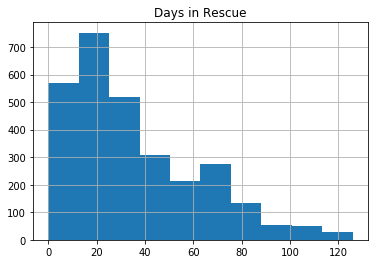

In [5]:
dogs.hist()

In [3]:
dogs.head(5)

,Name of Dog,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size,Days in Rescue
0,Aaron,N,Labrador,M,Young,Yellow,Medium,30.0
1,Abby,N,Dachshund,F,Adult,Tan,Small,11.0
2,Abby,N,Unknown,F,Adult,Brindle,Medium,31.0
3,Abby,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium,47.0
4,Abby,N,Chihuahua,F,Adult,Tan,Small,83.0


In [6]:
#Drop irrelevant variable columns
del dogs['Name of Dog']
del dogs['Sex']
dogs.head(5)

,Heartworm Positive,Breed,Age Group When Rescued,Color,Size,Days in Rescue
0,N,Labrador,Young,Yellow,Medium,30.0
1,N,Dachshund,Adult,Tan,Small,11.0
2,N,Unknown,Adult,Brindle,Medium,31.0
3,N,Mixed Breed (Non-Pitbull),Puppy,Multicolor,Medium,47.0
4,N,Chihuahua,Adult,Tan,Small,83.0


In [7]:
X = dogs[['Breed', 'Age Group When Rescued', 'Color', 'Size', 'Heartworm Positive']]

In [8]:
Y = dogs['Days in Rescue']

In [9]:
#Convert categorical variable into dummy/indicator variables 
#and drop one in each category
X = pd.get_dummies(data=X, drop_first=True)

In [10]:
#Split training and test sets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train_validation, X_test, Y_train_validation, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)

X_train, X_val, Y_train, Y_val = train_test_split(X_train_validation, Y_train_validation, test_size = .20, random_state = 40)


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2318, 118) (2318,)
(580, 118) (580,)


In [11]:
#Fit model on training data
lm = linear_model.LinearRegression()

lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
model = lm.fit(X_train, Y_train)
predictions[0:5]

array([39.81692703, 38.25156998, 30.96862045, 31.03574343, 47.20311031])

In [12]:
#Print model accuracy score
print(model.score(X_test, Y_test))

-1.0791672743119865e+23


Text(0, 0.5, 'Predictions')

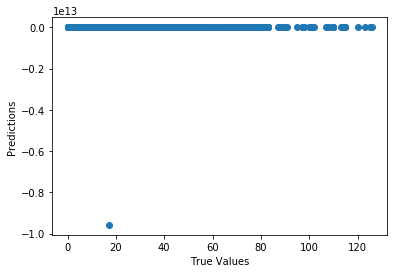

In [11]:
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')